<a href="https://colab.research.google.com/github/FreddyR424/Deep_Learning/blob/master/Alffredi_Ramos_Facial_Emotion_Detection_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Emotion Detection**

## **Milestone 1**

## **Problem Definition**

### **The context:** 
- Deep Learning has found applications in many predictive tasks relating to more unstructured forms of data over the last few years, such as images, text, audio and video. Many of these tasks seem to be in the vein of a larger direction of predictive modeling that aims to match human-level
performance on such tasks, because humans have evolved to specialize in performing intelligent actions on such unstructured data. As a specific branch of AI (also called Affective Computing or Emotion AI) Artificial Emotional Intelligence stands for the study and development of technologies and computers that can read human emotions by means of analyzing body gestures, facial
expressions, voice tone, etc. and react appropriately to them. In the field of human-machine interaction, facial expression recognition is critical. From recent research, it has been found that as much as 55% of communication of sentiment takes place through facial expressions and other visual cues. Therefore, training a model to identify facial emotions accurately is an important step towards the development of emotionally intelligent
behavior in machines with AI capabilities. Automatic facial expression recognition systems could have many applications, including but not limited to any use case that requires human behavior understanding, detection of mental disorders, and creating a higher quality of virtual assistant for customer-facing businesses.<br>
_______________________________________________________________________________
### **The objectives:** 
- The goal of this project is to use Deep Learning and Artificial Intelligence techniques to create a computer vision model that can accurately detect facial emotions. The model should be able to perform multi-class classification on images of facial expressions, to classify the expressions according to the associated emotion.<br>
_______________________________________________________________________________
### **The key questions:** 
- Will our Convolutional Neural Network models accurately predict facial emotions based on the image?<br>
- Will increasing parameters/weights achieve better model performance?<br>

_______________________________________________________________________________
### **The problem formulation:** 
- For this project, we will be using data science to try to accurately recognize facial emotions based on the images provided. 
_______________________________________________________________________________


## **Milestone 1 & 2 Summary**

- Upon completing Milestone's 1 & 2, we can see that the most accurate model for recognizing facial emotions was our second model compiled in Milestone 1. Our VGG16, ResNet, and EfiicientNet models were not as accurate and required more computation time than our Convolutional Neural Network models. For our final submission, we will be our base convolutional neural network and second CNN model from milestone 1 since these models performed the best as far as accuracy and computation time. 

_______________________________________________________________________________
## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

- **‘happy’**: Images of people who have happy facial expressions.<br>
- **‘sad’**: Images of people with sad or upset facial expressions.<br>
- **‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
- **‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [2]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Let us load the data**

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [3]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes. 

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

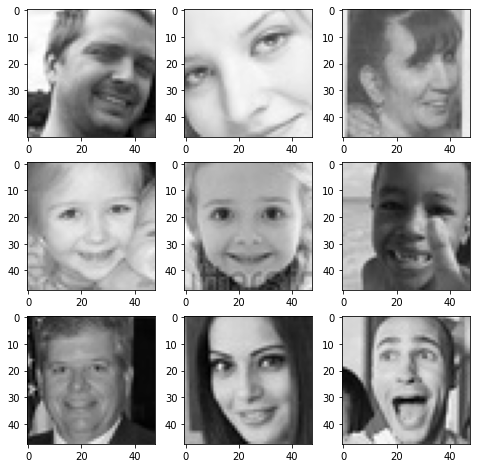

In [5]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:**
- The 9 images shown above in the 'happy' class show clear happiness facial expressions.

### **Sad**

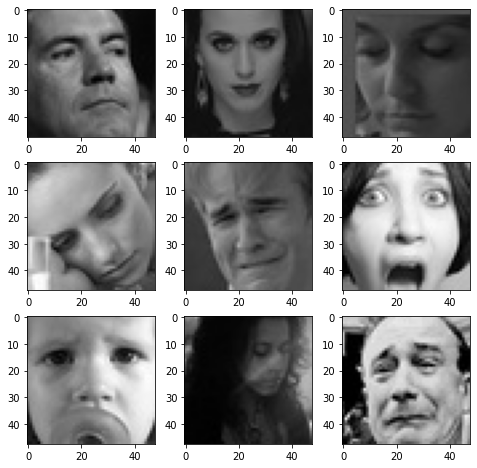

In [6]:
expression = 'sad'

plt.figure(figsize = (8, 8))
for i in range(1, 10, 1):
  plt.subplot(3, 3, i)

  img = load_img(folder_path + "train/" + expression + "/" +
                 os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
  plt.imshow(img)

plt.show()

**Observations and Insights:**
- 3 of the 9 images shown above in the 'sad' class can be confused for a mad facial expression rather than sad. 

### **Neutral**

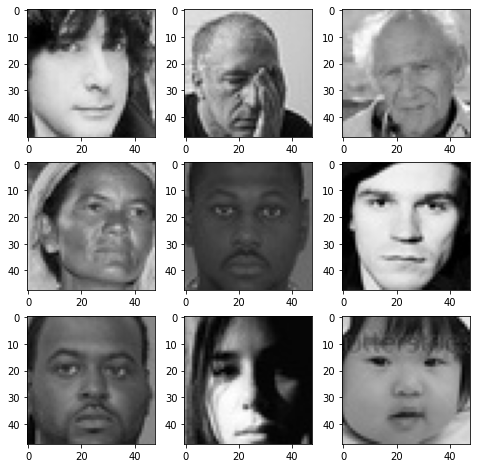

In [7]:
expression = 'neutral'

plt.figure(figsize = (8, 8))
for i in range(1, 10, 1):
  plt.subplot(3, 3, i)

  img = load_img(folder_path + "train/" + expression + "/" +
                 os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
  plt.imshow(img)

plt.show()

**Observations and Insights:**
- The 9 images shown above for the 'neutral' class all show neutral facial expressions.
- However, some of the above images can be mistaken for 'sad' facial expressions.

### **Surprised**

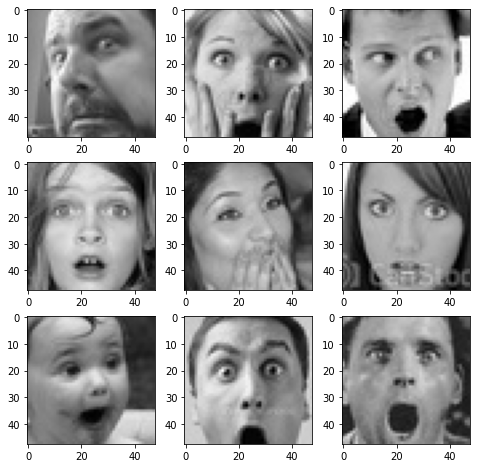

In [8]:
expression = 'surprise'

plt.figure(figsize = (8, 8))
for i in range(1, 10, 1):
  plt.subplot(3, 3, i)

  img = load_img(folder_path + "train/" + expression + "/" +
                 os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
  plt.imshow(img)

plt.show()

**Observations and Insights:**
- The 9 images shown above for the 'surprised' class all exhibit 'surprised' facial expressions.

## **Checking Distribution of Classes**

In [9]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':   ", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':   ", num_neutral)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise':    ", num_surprise)

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'neutral':    3978
Number of images in the class 'surprise':     3173


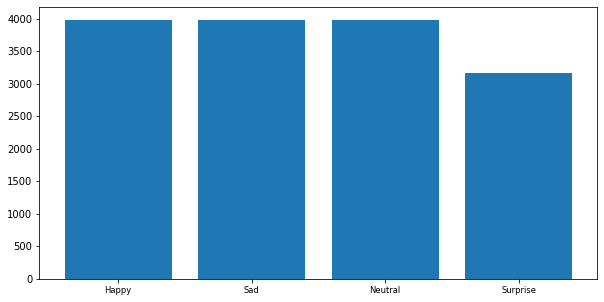

In [10]:
# Code to plot histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

**Observations and Insights:**
- For the most part, the classes are equally distributed except for a slight imbalance in the class 'surprise' which contains about 800 less images.
- This slight imbalance should not be a problem moving forward.
- I do not think any exploratory data analysis tasks would provide any meaningful insights.

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. A sample of the required code has been given with respect to the training data. Please create the data loaders for validation and test set accordingly.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [11]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                        brightness_range=(0.,2.),
                                        rescale=1./255,
                                        shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                 target_size = (img_size, img_size),
                                                 color_mode = 'grayscale',
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle = True)


datagen_test = ImageDataGenerator(horizontal_flip = True,
                                  brightness_range=(0.,2.),
                                  rescale=1./255,
                                  shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size = (img_size, img_size),
                                            color_mode = 'grayscale',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead? **CNNs are the right approach because CNNs are able to excel at making predictions on images.**
* What are the advantages of CNNs over ANNs and are they applicable here? **CNNs do this to a greater level than statistical Machine Learning techniques and Artificial Neural Networks (ANNs), because those algorithms flatten the spatial structure of an image right at the start, whereas CNNs only do so after applying a series of feature extraction steps on the image, such as Convolutions, Pooling, Padding, and non-linear Activation Functions.
Some of the reasons CNNs are advantageous over ANNs in making predictions on image data, are Spatial and Translational Invariance, the ability to extract important features and discard unimportant ones, and their relative computational efficiency over ANNs.**

### **Creating the Base Neural Network**

Our Base Neural network will be a fairly simple model architecture.

* We want our Base Neural Network architecture to have 3 convolutional blocks.
* Each convolutional block must contain one Conv2D layer followed by a maxpooling layer and one Dropout layer. We can play around with the dropout ratio.
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a dropout ratio of 0.2.
* Add a second Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.2 Dropout ratio to complete your second Convolutional Block.
* Add a third Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a Maxpooling2D layer and a Dropout layer to complete your third Convolutional block.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add a Dropout layer with dropout ratio of 0.4.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

In [12]:
# Initializing a Sequential Model
model1 = Sequential()

# Add the first Convolutional block
model1.add(Conv2D(64, (2, 2), input_shape = (48, 48, 1), padding = 'same', activation = 'relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(0.2))

# Add the second Convolutional block
model1.add(Conv2D(32, (2, 2), padding = 'same', activation = 'relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(0.2))

# Add the third Convolutional block
model1.add(Conv2D(32, (2, 2), padding = 'same', activation = 'relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(0.2))

# Add the Flatten layer
model1.add(Flatten())

# Add the first Dense layer
model1.add(Dense(512, activation = 'relu'))
model1.add(Dropout(0.4))

# Add the Final layer
model1.add(Dense(4, activation = 'softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0

### **Compiling and Training the Model**

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [14]:
# Write your code to compile your model1. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'. 
model1.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
# Write your code to fit your model1. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.

history = model1.fit(train_set, validation_data = validation_set, epochs = 20)

Epoch 1/20
473/473 [==============================] - 99s 207ms/step - loss: 1.3711 - accuracy: 0.2982 - val_loss: 1.3193 - val_accuracy: 0.3448
Epoch 2/20
473/473 [==============================] - 98s 206ms/step - loss: 1.2585 - accuracy: 0.4258 - val_loss: 1.2065 - val_accuracy: 0.4943
Epoch 3/20
473/473 [==============================] - 97s 206ms/step - loss: 1.1822 - accuracy: 0.4720 - val_loss: 1.1253 - val_accuracy: 0.5071
Epoch 4/20
473/473 [==============================] - 98s 206ms/step - loss: 1.1374 - accuracy: 0.4895 - val_loss: 1.1139 - val_accuracy: 0.5142
Epoch 5/20
473/473 [==============================] - 100s 211ms/step - loss: 1.0985 - accuracy: 0.5090 - val_loss: 1.0427 - val_accuracy: 0.5576
Epoch 6/20
473/473 [==============================] - 96s 203ms/step - loss: 1.0806 - accuracy: 0.5220 - val_loss: 1.0325 - val_accuracy: 0.5678
Epoch 7/20
473/473 [==============================] - 96s 203ms/step - loss: 1.0563 - accuracy: 0.5328 - val_loss: 1.0043 - val_a

### **Evaluating the Model on the Test Set**

In [16]:
test_images, test_labels = next(test_set)
accuracy = model1.evaluate(test_images, test_labels, verbose = 2)

1/1 - 0s - loss: 1.1856 - accuracy: 0.5000 - 58ms/epoch - 58ms/step


**Observations and Insights:**
- Our base model shows a train accuracy of 61%, a validation accuracy of 66%, and a test set accuracy of 50%.
- Adding more parameters/weights should improve accuracy.

### **Creating the second Convolutional Neural Network**

In the second Neural network, we will add a few more Convolutional blocks. We will also use Batch Normalization layers.

* This time, each Convolutional block will have 1 Conv2D layer, followed by a BatchNormalization, LeakuRelU, and a MaxPooling2D layer. We are not adding any Dropout layer this time.
* Add first Conv2D layer with **256 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
* Add MaxPooling2D layer with **pool size = 2**.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar BatchNormalization, LeakyRelU, and Maxpooling2D layer like above to complete your second Convolutional Block.
* Add a third Conv2D layer with **64 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a BatchNormalization, LeakyRelU, and Maxpooling2D layer to complete your third Convolutional block.
* Add a fourth block, with the Conv2D layer having **32 filters**.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add the second Dense Layer with **128 neurons** and use **'relu' activation** function.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

In [17]:
# Creating sequential model
model2 = Sequential()
 
# Add the first Convolutional block
model2.add(Conv2D(256, (2, 2), padding = 'same', activation = 'relu', input_shape = (48, 48, 1)))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2, 2))

# Add the second Convolutional block
model2.add(Conv2D(128, (2, 2), padding = 'same', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2, 2))

# Add the third Convolutional block
model2.add(Conv2D(64, (2, 2), padding = 'same', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2, 2))

# Add the fourth Convolutional block
model2.add(Conv2D(256, (2, 2), padding = 'same', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2, 2))

# Add the Flatten layer
model2.add(Flatten())

# Adding the Dense layers
model2.add(Dense(512, activation = 'relu'))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(4, activation = 'softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 256)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)     

### **Compiling and Training the Model**

**Hint:** Take reference from the code we used in the previous model for Compiling and Training the Model.

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model2.h5", monitor='val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [19]:
model2.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
history = model2.fit(train_set, validation_data = validation_set, epochs = 30)

Epoch 1/30
473/473 [==============================] - 584s 1s/step - loss: 1.3335 - accuracy: 0.3916 - val_loss: 1.3124 - val_accuracy: 0.3958
Epoch 2/30
473/473 [==============================] - 599s 1s/step - loss: 1.0595 - accuracy: 0.5284 - val_loss: 1.0418 - val_accuracy: 0.5435
Epoch 3/30
473/473 [==============================] - 563s 1s/step - loss: 0.9506 - accuracy: 0.5922 - val_loss: 0.9539 - val_accuracy: 0.5841
Epoch 4/30
473/473 [==============================] - 554s 1s/step - loss: 0.8935 - accuracy: 0.6165 - val_loss: 0.9336 - val_accuracy: 0.6008
Epoch 5/30
473/473 [==============================] - 551s 1s/step - loss: 0.8325 - accuracy: 0.6462 - val_loss: 0.8632 - val_accuracy: 0.6367
Epoch 6/30
473/473 [==============================] - 550s 1s/step - loss: 0.7970 - accuracy: 0.6627 - val_loss: 0.8661 - val_accuracy: 0.6405
Epoch 7/30
473/473 [==============================] - 552s 1s/step - loss: 0.7721 - accuracy: 0.6762 - val_loss: 0.8749 - val_accuracy: 0.6241

### **Evaluating the Model on the Test Set**

In [45]:
test_images, test_labels = next(test_set)
accuracy = model2.evaluate(test_images, test_labels, verbose = 2)

1/1 - 0s - loss: 0.8673 - accuracy: 0.7500 - 266ms/epoch - 266ms/step


**Observations and Insights:**
- Train accuracy is 86%.
- Validation accuracy is 70%.
- Test set accuracy is 75%.
- Overall good improvement from previous model. 

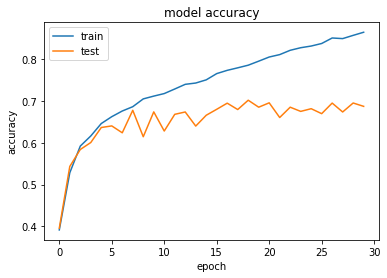

In [56]:
# Plotting the training and validation accuracies for each epoch 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Observations:**
- From the above plot, we observe that the training accuracy is continuously improving. However, it was not the case with the validation accuracy. The validation accuracy started fluctuating after 5 epochs and maintained itself in the 0.60-0.70 range.
- However, the model was consistent on validation and test data.

## **Plotting the Confusion Matrix for the chosen final model**

Found 128 images belonging to 4 classes.
4/4 [==============================] - 1s 249ms/step
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.27      0.22      0.24        32
           2       0.32      0.41      0.36        32
           3       0.87      0.84      0.86        32

    accuracy                           0.55       128
   macro avg       0.56      0.55      0.56       128
weighted avg       0.56      0.55      0.56       128



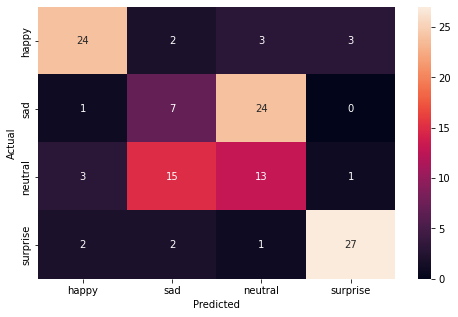

In [53]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True) 
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model2.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### **Observations:**
- The highest F1 scores belong to the 'happy' and 'surprise' classes.
- The highest precision also belongs to the 'happy' and 'surprise' classes.
- The model overall performed decently at around ~56% accuracy from the confusion matrix above.
- The recall has an average of 0.55 indicating that the model is good at identifying some facial expressions and poor at identifying other facial expressions; i.e., 'sad' and 'neutral'.
- The most confusion/misclassification comes from the 'sad' and 'neutral' classes.

## **Conclusion:**

- Finding the most efficient architecture that can classify the images of facial emotions into their respective classes.
- We visualized 4 types of facial emotions: 'happy', 'sad', 'neutral', and 'surprise'. It is relatively easy to detect someones facial emotions from happy and sad, but distinguishing between sad and neutral can be difficult. As shown in the heatmap above, the models had trouble as well detecting/distinguishing the two.
- Our final model performed relatively well given the difficulty of this task with a training accuracy of 86%, a validation accuracy of 70%, and a test set accuracy of 75%. 
- Although computation time was slightly long, this model performed best at the task of distinguishing/recognizing facial emotion based on the test set images. 
- Being able to automate this task using CNNs would represent benefits such as the ability to provide faster observations than a human, and the ability to handle a larger volume of the same task. Secondly, as a piece of software, it could be distributed anywhere in the world, including in less well-connected regions of the world that may not have access to experts capable of such diagnoses from X-ray scans.
- However, Deep Learning based solutions have a few hurdles to overcome before mainstream acceptance. Their lack of explainability, their brittleness and susceptibility to small perturbations in images, and the need to achieve very high performance on evaluation metrics for acceptance, makes it difficult to currently use them as a singular source of truth, and they can only be considered as a part of the decision-making process in assistance to medical professionals qualified for these operations.

## **Problem and Solution Summary:**
- This project was used to solve the problem of developing an Automated Facial Expression Recognition model with high accuracy and moderate-low computation time. 
- Convolutional Neural Networks (CNNs), are able to excel at making predictions on images. CNNs do this to a greater level than statistical Machine Learning techniques because they apply a series of feature extraction steps on the image, such as Convolutions, Pooling, Padding, and non-linear Activation Functions. Some of the reasons CNNs are advantageous over in making predictions on image data, are Spatial and Translational Invariance, the ability to extract important features and discard unimportant ones, and their relative computational efficiency.
- Compared to the other models used throughout this project, the CNN models performed the best; giving the best accuracies and best computation times. Vgg16, ResNet, and EfficientNet models are not ideal for the detection/recognition of facial emotions.

## **Recommendations for Implementation:**
- Automatic facial expression recognition systems could have many applications, including but not limited to any use case that requires human behavior understanding, detection of mental disorders, and creating a higher quality of virtual assistant for customer-facing businesses. 
- Some key recommendations to implement the solutions could be to release a test version of the model for customers to utilize in order to see the accuracy of their facial emotion recognition.
- Key actionables for stakeholders include: releasing a beta version of the facial expression recognition software, recieve feedback on the software, make changes/update the software accordingly, change the model if needed, re-release software, and gather more feedback until the software works to our liking.
- The expected benefits of this project would be developing a model that is able to accurately classify facial expressions into their respective classes based on the image. Key risks/challenges are fine tuning the model to reach desirable numbers, which can take a lot of time and computation power/time.  
- Further analysis could be done in order to better improve our model to achieve better accuracy and computation time. For instance, we can look for better distinguishing photos of the classes 'sad' and 'neutral' and add them to our dataset to better help our model. We can also tune our model by adding/removing weights/parameters. We can also search for and utlize other models that may do better than CNN's. The biggest associated problems with this project was the models ability to distinguish between the 'sad' and 'neutral' classes. 